In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [35]:
# 画出分类决策域
def plot_decision_regions(x, y, classifier, title, test_idx=None, resolution=0.02):
    markers = ('x', 's', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors=colors[:len(np.unique(y))])
    # plot decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot samples
    x_test, y_test = x[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1], 
                    alpha=0.8, 
                    c=cmap(idx),marker=markers[idx],
                    label=cl)
    # highlight test samples
    if test_idx:# not test_idx == None
        plt.scatter(x_test[:,0], 
                    x_test[:,1], 
                    c='black',
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o',
                    s=55,
                    label='test set')
    plt.xlabel('petal length (std)')
    plt.ylabel('petal width (std)')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

In [30]:
np.random.seed(0)
x = np.random.randn(200, 2)
y = np.logical_xor(x[:, 0]>0 , x[:, 1]>0)
y = np.where(y, 1, -1)

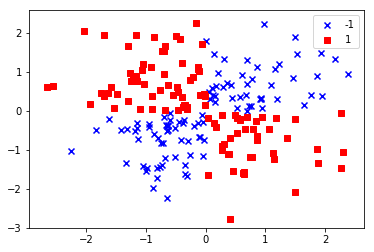

In [37]:
markers = ['x', 's']
colors = ['blue', 'red']
for idx, label in enumerate([-1, 1]):
    plt.scatter(x=x[y==label, 0],
                y=x[y==label, 1], 
                c=colors[idx],
                marker=markers[idx],
                label=str(label))
plt.ylim(-3)
plt.legend()
plt.show()


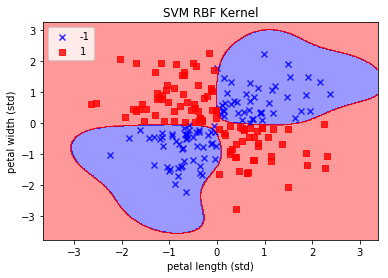

the ACC of kernel SVC is 0.98


In [40]:
svc = SVC(kernel="rbf", random_state=0, gamma=1.0, C=10.0)
svc.fit(x, y)
plot_decision_regions(x=x, y=y, classifier=svc, title='SVM RBF Kernel')
print("the ACC of kernel SVC is %.2f" % ((svc.predict(x) == y).sum()/len(y)))